<h1>Chicago Police Department Investigatory Stop Report Racial Data 2018-19</h1>
<p>We'll be investigating the racial breakdown of the Chicago Police Department's (CPD) Investigatory Stop Report (ISR)--essentially stop and frisk--data between 2018 and 2019 to look for racially-driven trends. The ISR data set is openly available on the CPD's website, along with a legend. There are dozens of variables that we didn't get to explore here like gender, police district, residential district, use of violence, and more.</p>

In [2]:
import pandas as pd
import numpy as np
!pip install ipython-sql --quiet

In [3]:
%load_ext sql
%sql ibm_db_sa://shm38462:c8551g-sn0bj94cg@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
%reload_ext sql

In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
import ibm_db
import ibm_db_dbi

# connect to IBM Db2

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"
dsn_hostname = "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_port = "50000"
dsn_protocol = "TCPIP"
dsn_uid = "shm38462"
dsn_pwd

dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  shm38462 on host:  dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net


<h2>Racial breakdown of ISRs</h2>
<p>Here we investigate the proportions at which people of different races are stopped on the street. We will also consider how many of these stops actually result in some sort of criminal findings and police results</p>

In [5]:
# makes a pandas connection
pconn = ibm_db_dbi.Connection(conn)

query = '''select
            CREATED_BY,
            CREATED_DATE,
            RACE_CODE_CD,
            DISTRICT,
            RES_DISTRICT,
            HANDCUFFED_I,
            ENFORCEMENT_ACTION_TAKEN_I,
            PAT_DOWN_I,
            SUSPICIOUS_OBJECT_I,
            WEAPON_OR_CONTRABAND_FOUND_I,
            ENFORCEMENT_TYPE_CD
            from CHICAGOISR;
            '''
chicago_isr = pd.read_sql(query, pconn)
chicago_isr.head()

,CREATED_BY,CREATED_DATE,RACE_CODE_CD,DISTRICT,RES_DISTRICT,HANDCUFFED_I,ENFORCEMENT_ACTION_TAKEN_I,PAT_DOWN_I,SUSPICIOUS_OBJECT_I,WEAPON_OR_CONTRABAND_FOUND_I,ENFORCEMENT_TYPE_CD
0,185285,01-JAN-2018 01:46,WWH,25,16,,N,N,,,
1,675642,01-JAN-2018 01:35,WWH,25,25,,N,N,,,
2,185285,01-JAN-2018 01:35,WWH,25,25,,N,N,,,
3,469481,01-JAN-2018 01:01,WWH,25,17,,N,Y,,N,
4,666758,01-JAN-2018 01:36,BLK,7,02,,N,Y,Y,N,


In [6]:
chicago_isr['HANDCUFFED_I'].value_counts()

    290145
Name: HANDCUFFED_I, dtype: int64

In [7]:
chicago_isr.loc[chicago_isr.PAT_DOWN_I != 'Y', 'PAT_DOWN_I'] = 0
chicago_isr.loc[chicago_isr.PAT_DOWN_I == 'Y', 'PAT_DOWN_I'] = 1

chicago_isr.loc[chicago_isr.HANDCUFFED_I != 'Y', 'HANDCUFFED_I'] = 0
chicago_isr.loc[chicago_isr.HANDCUFFED_I == 'Y', 'HANDCUFFED_I'] = 1

chicago_isr.loc[chicago_isr.ENFORCEMENT_ACTION_TAKEN_I != 'Y', 'ENFORCEMENT_ACTION_TAKEN_I'] = 0
chicago_isr.loc[chicago_isr.ENFORCEMENT_ACTION_TAKEN_I == 'Y', 'ENFORCEMENT_ACTION_TAKEN_I'] = 1

chicago_isr.loc[chicago_isr.SUSPICIOUS_OBJECT_I != 'Y', 'SUSPICIOUS_OBJECT_I'] = 0
chicago_isr.loc[chicago_isr.SUSPICIOUS_OBJECT_I == 'Y', 'SUSPICIOUS_OBJECT_I'] = 1

chicago_isr.loc[chicago_isr.WEAPON_OR_CONTRABAND_FOUND_I != 'Y', 'WEAPON_OR_CONTRABAND_FOUND_I'] = 0
chicago_isr.loc[chicago_isr.WEAPON_OR_CONTRABAND_FOUND_I == 'Y', 'WEAPON_OR_CONTRABAND_FOUND_I'] = 1

chicago_isr = chicago_isr.replace(r'^\s*$', 0, regex=True)

chicago_isr.astype({'HANDCUFFED_I':'float64','ENFORCEMENT_ACTION_TAKEN_I':'float64','PAT_DOWN_I':'float64','SUSPICIOUS_OBJECT_I':'float64','WEAPON_OR_CONTRABAND_FOUND_I':'float64','ENFORCEMENT_TYPE_CD':'object'})
chicago_isr.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,CREATED_BY,CREATED_DATE,RACE_CODE_CD,DISTRICT,RES_DISTRICT,HANDCUFFED_I,ENFORCEMENT_ACTION_TAKEN_I,PAT_DOWN_I,SUSPICIOUS_OBJECT_I,WEAPON_OR_CONTRABAND_FOUND_I,ENFORCEMENT_TYPE_CD
0,185285,01-JAN-2018 01:46,WWH,25,16,0,0,0,0,0,0
1,675642,01-JAN-2018 01:35,WWH,25,25,0,0,0,0,0,0
2,185285,01-JAN-2018 01:35,WWH,25,25,0,0,0,0,0,0
3,469481,01-JAN-2018 01:01,WWH,25,17,0,0,1,0,0,0
4,666758,01-JAN-2018 01:36,BLK,7,02,0,0,1,1,0,0


In [8]:
chicago_isr['ENFORCEMENT_ACTION_TAKEN_I'].value_counts()

0    222578
1     67567
Name: ENFORCEMENT_ACTION_TAKEN_I, dtype: int64

In [9]:
races = {'BLK':'Black', 'WWH':'Hispanic', 'WHT':'White', 'API':'Asian or PI', 'P':'Other', 'I':'Other', 'WHI':'Other', 'WBH':'Other', 'U':'Other'}
chicago_isr['RACE_CODE_CD'] = chicago_isr['RACE_CODE_CD'].map(races)
chicago_isr.head()

,CREATED_BY,CREATED_DATE,RACE_CODE_CD,DISTRICT,RES_DISTRICT,HANDCUFFED_I,ENFORCEMENT_ACTION_TAKEN_I,PAT_DOWN_I,SUSPICIOUS_OBJECT_I,WEAPON_OR_CONTRABAND_FOUND_I,ENFORCEMENT_TYPE_CD
0,185285,01-JAN-2018 01:46,Hispanic,25,16,0,0,0,0,0,0
1,675642,01-JAN-2018 01:35,Hispanic,25,25,0,0,0,0,0,0
2,185285,01-JAN-2018 01:35,Hispanic,25,25,0,0,0,0,0,0
3,469481,01-JAN-2018 01:01,Hispanic,25,17,0,0,1,0,0,0
4,666758,01-JAN-2018 01:36,Black,7,02,0,0,1,1,0,0


In [10]:
chicago_isr.dropna(axis='rows', inplace = True)
chicago_isr_race = chicago_isr.groupby(by='RACE_CODE_CD', axis=0).sum()
chicago_isr_race.drop(['CREATED_BY','DISTRICT','HANDCUFFED_I'], axis=1, inplace=True)
chicago_isr_race.columns = ['Police\nEnforcement','Pat\nDowns', 'Suspicious\nObject', 'Weapon or\nContraband Found']

#convert to percents
chicago_isr_race = (100*chicago_isr_race / chicago_isr_race.sum()).round(1)

#adding 2019 racial demographic info from US Census Bureau:
chicago_isr_race['Chicago\nPopulation'] = [6.3,29.7,28.6,2.9,32.4]

#order by the percent of Chicago population
chicago_isr_race.sort_values(by=['Chicago\nPopulation'], inplace=True, ascending=False)

#move Chicago Total to the first spot
cols = chicago_isr_race.columns.tolist()
cols = cols[-1:] + cols[:-1]
chicago_isr_race = chicago_isr_race[cols]

chicago_isr_race = chicago_isr_race.transpose()
chicago_isr_race = chicago_isr_race.reindex(['Chicago\nPopulation','Pat\nDowns','Suspicious\nObject', 'Weapon or\nContraband Found','Police\nEnforcement'])
chicago_isr_race.head()

RACE_CODE_CD,White,Black,Hispanic,Asian or PI,Other
Chicago\nPopulation,32.4,29.7,28.6,6.3,2.9
Pat\nDowns,4.4,73.9,21.0,0.5,0.2
Suspicious\nObject,4.1,74.8,20.4,0.5,0.2
Weapon or\nContraband Found,6.1,76.5,16.7,0.6,0.2
Police\nEnforcement,7.4,71.3,20.2,0.8,0.4


In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('default')

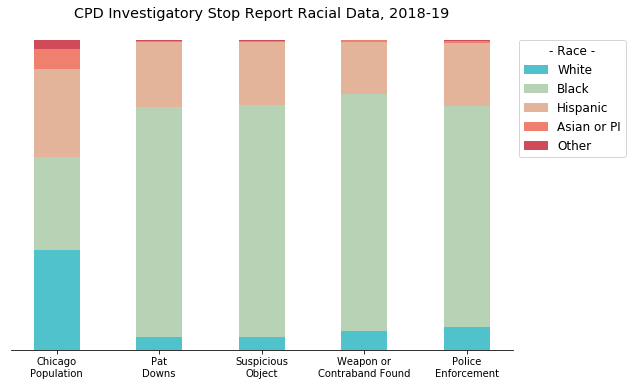

In [12]:
#making a stacked bar chart of all this

fig, ax = plt.subplots(figsize=(9,6))

labels = list(chicago_isr_race.index.values)
colors1 = ['#4fc2cc','#b8d2b5','#e3b49a','#ee806d','#d04b59']
colors2 = ['#e30000','#dd9d9d','#312424','#455845','#f2bd17']
width = 0.45

for i in range(5):
    bot = 0
    if i == 0:
        ax.bar(labels, chicago_isr_race.iloc[:,0], width, bottom = 0, color=colors1[i])
    else:
        for j in range(i):
            #calculate where the bottom of each bar lies; should be the sum of all lower bars
            bot += chicago_isr_race.iloc[:,j]
        ax.bar(labels, chicago_isr_race.iloc[:,i], width, bottom = bot,color=colors1[i])

font = {'size':12}
plt.rc('font', **font)

ax.legend(labels=chicago_isr_race.columns, bbox_to_anchor=(1, 0.97), loc='upper left', ncol=1, title='- Race -', fancybox=True)
ax.axes.get_yaxis().set_visible(False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.title(label='CPD Investigatory Stop Report Racial Data, 2018-19')
plt.show()

<p>So here's our first chart. Here 'Pat Downs' refers to when officers physically touch a suspect to check for contraband or weapons. 'Suspicious Object' indicates whether the officer was suspicious of something in the suspect's possesion before patting them down. 'Police Enforcement' indicates whether the suspect was arrested, issued a citation, etc. (otherwise they are let go). <br>It should also be noted that while the 'Chicago Population' bar is based on census data, all other bars are based on police officers' immediate impressions. So, for example, while a white-passing Black person counts as 'Black' in the first bar, they may be marked 'White' in the others. Moreover, these racial groups represent the options available on the CPD ISR form. <br>Based on more than 290,000 Investagatory Stop Reports from the Chicago Police Department between 2018 and 2019<p>

<h2>Businesses near ISRs</h2>
<p>Here we investigate where police ISRs typically happen and what types of businesses are often nearby. By sorting which locations are popular for stops from people of different races, we may gain some insight into police trends.</p>

In [13]:
# makes a pandas connection
pconn = ibm_db_dbi.Connection(conn)

query = '''select
            CREATED_DATE,
            RACE_CODE_CD,
            ENFORCEMENT_TYPE_CD,
            STREET_NO,
            STREET_DIRECTION_CD,
            STREET_NME,
            CITY,
            STATE_CD
            from CHICAGOISR;
            '''
isr_loc = pd.read_sql(query, pconn)
isr_loc.head()

,CREATED_DATE,RACE_CODE_CD,ENFORCEMENT_TYPE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD
0,01-JAN-2018 01:46,WWH,,40XX,W,OAKDALE AVE,CHICAGO,IL
1,01-JAN-2018 01:35,WWH,,40XX,W,OAKDALE AVE,CHICAGO,IL
2,01-JAN-2018 01:35,WWH,,40XX,W,OAKDALE AVE,CHICAGO,IL
3,01-JAN-2018 01:01,WWH,,28XX,N,NATCHEZ AVE,CHICAGO,IL
4,01-JAN-2018 01:36,BLK,,64XX,S,ABERDEEN ST,CHICAGO,IL


In [14]:
isr_loc = isr_loc.replace(r'^\s*$', 'N/A', regex=True)
isr_loc['RACE_CODE_CD'] = isr_loc['RACE_CODE_CD'].map(races)

isr_loc['CREATED_DATE'] = 1
isr_loc.astype({'CREATED_DATE':'float64','STREET_NO':'object'})

isr_loc['ADDRESS'] = np.zeros(isr_loc.shape[0])
isr_loc.head()

,CREATED_DATE,RACE_CODE_CD,ENFORCEMENT_TYPE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ADDRESS
0,1,Hispanic,N/A,40XX,W,OAKDALE AVE,CHICAGO,IL,0.0
1,1,Hispanic,N/A,40XX,W,OAKDALE AVE,CHICAGO,IL,0.0
2,1,Hispanic,N/A,40XX,W,OAKDALE AVE,CHICAGO,IL,0.0
3,1,Hispanic,N/A,28XX,N,NATCHEZ AVE,CHICAGO,IL,0.0
4,1,Black,N/A,64XX,S,ABERDEEN ST,CHICAGO,IL,0.0


In [17]:
# concatenate address names and find latitude and longitude for them
# because this is such an intensive process, we take a random sample from the large original data set
sample_size = 0.003

isr_loc_sample = isr_loc.sample(frac=sample_size, replace=False, random_state=1)
isr_loc_sample.reset_index(drop=True, inplace=True)

for i in range(isr_loc_sample.shape[0]):
    isr_loc_sample.loc[i,'STREET_NO'] = isr_loc_sample.loc[i,'STREET_NO'].replace('XX','00')

isr_loc_sample['address_list'] = isr_loc_sample[['STREET_NO', 'STREET_NME', 'CITY', 'STATE_CD']].values.tolist()

for i in range(isr_loc_sample.shape[0]):
    isr_loc_sample.loc[i,'ADDRESS'] = ' '.join(isr_loc_sample.loc[i,'address_list']).replace('XX','00',1)
    
# collect coordinates for each address
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="chicago")
isr_loc_sample['Latitude'] = isr_loc_sample['Longitude'] = np.zeros(isr_loc_sample.shape[0])

none_count = 0
for i in range(isr_loc_sample.shape[0]):
    location = geolocator.geocode(isr_loc_sample.loc[i,'ADDRESS'])
    
    if location is None:
        none_count += 1
        continue
        
    isr_loc_sample.loc[i,'Latitude'] = location.latitude
    isr_loc_sample.loc[i,'Longitude'] = location.longitude

print('Finished loop with none_count =',none_count)
isr_loc_sample.drop(['STREET_NO','STREET_DIRECTION_CD','STREET_NME','CITY','STATE_CD','address_list'], axis=1, inplace=True)
isr_loc_sample = isr_loc_sample[isr_loc_sample['Latitude'] != 0]
isr_loc_sample.head()

Finished loop with none_count = 159


,CREATED_DATE,RACE_CODE_CD,ENFORCEMENT_TYPE_CD,ADDRESS,Latitude,Longitude
0,1,Black,N/A,11200 MICHIGAN AVE CHICAGO IL,41.890916,-87.624044
1,1,White,N/A,6900 GREEN ST CHICAGO IL,41.505727,-87.625261
3,1,Black,OTH,6400 SHERIDAN RD CHICAGO IL,42.330185,-87.839874
4,1,Hispanic,N/A,5900 PULASKI RD CHICAGO IL,41.696378,-87.720703
5,1,White,N/A,800 WAVELAND AVE CHICAGO IL,41.949259,-87.656524


In [18]:
# The code was removed by Watson Studio for sharing.

In [20]:
import json
import requests
from pandas.io.json import json_normalize

radius = 50 # meters
LIMIT = 30
def getNearbyVenues(addresses, races, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for addr, race, lat, lng in zip(addresses, races, latitudes, longitudes):
        # print(addr)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()['response']['groups'][0]['items']
        except KeyError:
            continue
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            addr,
            race,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Street Address',
                             'Race',
                              'Address Latitude', 
                              'Address Longitude', 
                              'Venue', 
                              'Venue Latitude', 
                              'Venue Longitude', 
                              'Venue Category']
    
    return(nearby_venues)

isr_venues = getNearbyVenues(addresses = isr_loc_sample['ADDRESS'],
                             races = isr_loc_sample['RACE_CODE_CD'],
                            latitudes = isr_loc_sample['Latitude'],
                            longitudes = isr_loc_sample['Longitude'])
#isr_venues.head()

In [21]:
# Now we make a sub data frame using one-hot encoding for the venue catagories
isr_venues_onehot = pd.get_dummies(isr_venues[['Venue Category']], prefix='', prefix_sep='')
isr_venues_onehot['Street Address'] =isr_venues['Street Address']
isr_venues_onehot['Race'] =isr_venues['Race']

# Move these columns to the front
fixed_columns = [isr_venues_onehot.columns[-1]] + list(isr_venues_onehot.columns[:-1])
isr_venues_onehot = isr_venues_onehot[fixed_columns]

fixed_columns = [isr_venues_onehot.columns[-1]] + list(isr_venues_onehot.columns[:-1])
isr_venues_onehot = isr_venues_onehot[fixed_columns]

# group race and address into a comma-separated string so we can use groupby
# isr_venues_onehot['metadatalist'] = isr_venues_onehot[['Street Address', 'Race']].values.tolist()
# for i in range(isr_venues_onehot.shape[0]):
#     isr_venues_onehot.loc[i,'metadatastr'] = ','.join(isr_venues_onehot.loc[i,'metadatalist'])

# group the venues near each isr
isr_venues_grouped = isr_venues_onehot.groupby('Race').sum().reset_index().set_index('Race')

isr_venues_grouped.head(10)

,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Video Store,Vietnamese Restaurant,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
Race,,,,,,,,,,,,,,,,,,,,,
Asian or PI,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,4
Black,13,9,3,36,3,2,0,4,3,118,...,59,1,2,1,0,9,18,46,29,18
Hispanic,5,1,0,2,1,0,1,1,2,29,...,19,2,0,0,1,1,3,8,3,7
Other,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
White,3,0,1,1,0,0,1,0,1,11,...,3,0,0,0,1,1,2,2,3,2


In [22]:
# Now we need to normalize the ROWS by dividing by the total number of ISRs for each race so we can compare these results
isr_venue_race_counts = pd.DataFrame(isr_venues['Race'].value_counts())
isr_venue_race_counts = isr_venue_race_counts.transpose()

isr_venues_grouped_trans = isr_venues_grouped.transpose()
isr_venues_grouped_trans.drop(['Other'], axis=1, inplace=True)

for race in isr_venues_grouped_trans.columns:
    race_count = isr_venue_race_counts.loc['Race', race]
    isr_venues_grouped_trans[race] /= race_count
    isr_venues_grouped_trans[race] *= 100

#isr_venues_grouped = isr_venues_grouped_trans.transpose()
isr_venues_grouped_trans.head()

Race,Asian or PI,Black,Hispanic,White
ATM,0.0,0.223598,0.299401,0.572519
Accessories Store,0.0,0.154799,0.059880,0.000000
Adult Boutique,0.0,0.051600,0.000000,0.190840
African Restaurant,0.0,0.619195,0.119760,0.190840
Airport,0.0,0.051600,0.059880,0.000000


In [23]:
isr_venues_grouped_trans.nlargest(15,'Black')

Race,Asian or PI,Black,Hispanic,White
Sandwich Place,4.123711,3.629171,3.772455,3.816794
Fast Food Restaurant,1.030928,3.285174,2.934132,1.908397
Pizza Place,4.123711,2.820777,3.053892,2.480916
Grocery Store,3.092784,2.665979,2.754491,1.526718
Mexican Restaurant,1.030928,2.425181,4.131737,1.717557
Seafood Restaurant,1.030928,2.304782,1.197605,1.717557
Discount Store,0.000000,2.201582,2.275449,1.908397
Park,3.092784,2.184383,2.634731,2.671756
Donut Shop,1.030928,2.132783,2.215569,2.671756
Cosmetics Shop,0.000000,2.115583,1.197605,0.954198


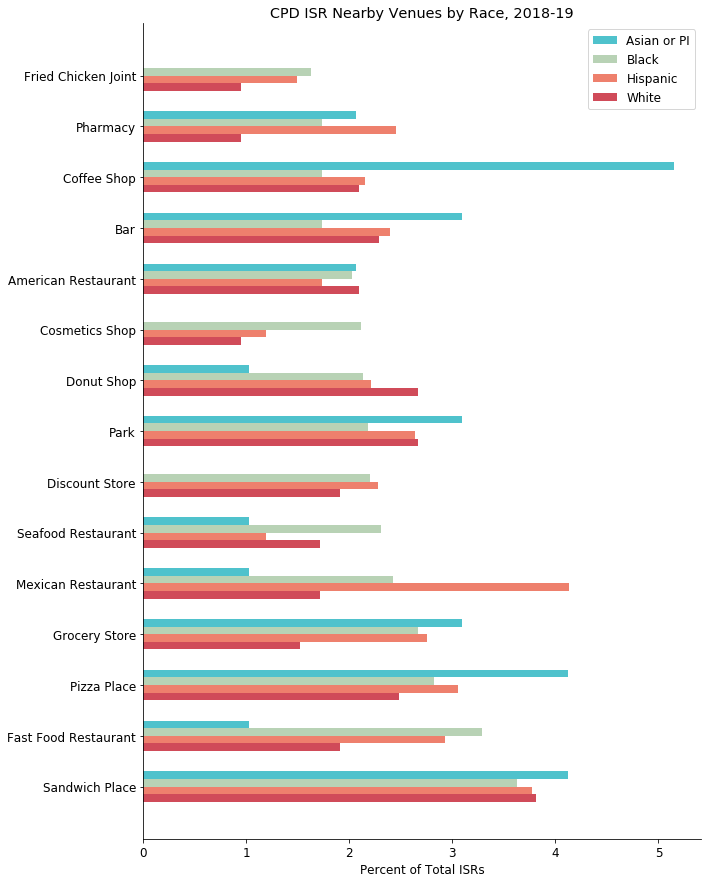

In [24]:
fig, ax = plt.subplots(figsize=(10,15))
plot_race = 'Black'
n = 15

labels = list(isr_venues_grouped_trans.nlargest(n,plot_race).index.values)
colors1 = ['#4fc2cc','#b8d2b5','#e3b49a','#ee806d','#d04b59']
colors2 = ['#e30000','#dd9d9d','#312424','#455845','#f2bd17']
width = 0.15

ypos = np.arange(n)

#for col in isr_venues_grouped_trans.nlargest(n,'Black').columns:
ax.barh(ypos + 1.5 * width, isr_venues_grouped_trans.nlargest(15,plot_race)['Asian or PI'], width, color=colors1[0], label='Asian or PI')
ax.barh(ypos + 0.5 * width, isr_venues_grouped_trans.nlargest(15,plot_race)['Black'], width, color=colors1[1], label='Black')
ax.barh(ypos - 0.5 * width, isr_venues_grouped_trans.nlargest(15,plot_race)['Hispanic'], width, color=colors1[3], label='Hispanic')
ax.barh(ypos - 1.5 * width, isr_venues_grouped_trans.nlargest(15,plot_race)['White'], width, color=colors1[4], label='White')

ax.set(yticks=ypos, yticklabels=labels, xticks=[0,1,2,3,4,5])
ax.legend()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.title(label='CPD ISR Nearby Venues by Race, 2018-19')

ax.set_xlabel('Percent of Total ISRs')

font = {'size':14}
plt.rc('font', **font)

plt.show()

<p>And now here is our plot of the venues near which investigatory stop reports are likely to occur. Not sure this is actually that interesting since there doesn't seem to be much variance between these figures--we can only really conclude that Hispanic people tend to be searched near Mexican Restaurants and Asian people and Pacific Islanders near Coffee Shops. We'd have to calculate some more statistical figures to see if these are actually significant. Nevertheless, since this is based on a fairly large sample of about 1000 ISRs, even medium differences may have some meaning. It is also worth noting the prevelance of such types of venues; of coure Sandwich, Fast Food, and Pizza Places are high on the list because they are such common catagories.</p>

<h2>Prevelance of Racial Bias Among Officers</h2>

In [76]:
pconn = ibm_db_dbi.Connection(conn)

query = '''select
            CREATED_BY,
            RACE_CODE_CD,
            ENFORCEMENT_TYPE_CD
            from CHICAGOISR;
            '''
cpd_bias= pd.read_sql(query, pconn)
cpd_bias.head()

,CREATED_BY,RACE_CODE_CD,ENFORCEMENT_TYPE_CD
0,185285,WWH,
1,675642,WWH,
2,185285,WWH,
3,469481,WWH,
4,666758,BLK,


In [77]:
races = {'BLK':'Black', 'WWH':'Hispanic', 'WHT':'White', 'API':'Asian or PI', 'P':'Other', 'I':'Other', 'WHI':'Other', 'WBH':'Other', 'U':'Other'}
cpd_bias['RACE_CODE_CD'] = cpd_bias['RACE_CODE_CD'].map(races)
cpd_bias_onehot = pd.get_dummies(cpd_bias[['RACE_CODE_CD']], prefix='', prefix_sep='')

for col in cpd_bias_onehot.columns:
    cpd_bias[col] = cpd_bias_onehot[col]

cpd_bias.head()

,CREATED_BY,RACE_CODE_CD,ENFORCEMENT_TYPE_CD,Asian or PI,Black,Hispanic,Other,White
0,185285,Hispanic,,0,0,1,0,0
1,675642,Hispanic,,0,0,1,0,0
2,185285,Hispanic,,0,0,1,0,0
3,469481,Hispanic,,0,0,1,0,0
4,666758,Black,,0,1,0,0,0


In [80]:
#divide the df by the enforcement type
cpd_bias_arr = cpd_bias.loc[cpd_bias['ENFORCEMENT_TYPE_CD'] == 'ARR']
cpd_bias_none = cpd_bias.loc[cpd_bias['ENFORCEMENT_TYPE_CD'] == '']
cpd_bias_psc = cpd_bias.loc[cpd_bias['ENFORCEMENT_TYPE_CD'] == 'ANOV']
cpd_bias_anov = cpd_bias.loc[cpd_bias['ENFORCEMENT_TYPE_CD'] == 'PSC']
cpd_bias_oth = cpd_bias.loc[cpd_bias['ENFORCEMENT_TYPE_CD'] == 'OTH']

cpd_bias_labels = ['None', 'Arrest', 'PSC', 'ANOV', 'Other']
cpd_bias_dfs = [cpd_bias_none, cpd_bias_arr, cpd_bias_psc, cpd_bias_anov, cpd_bias_oth]

for i in range(len(cpd_bias_dfs)):
    cpd_bias_dfs[i].drop(['RACE_CODE_CD', 'ENFORCEMENT_TYPE_CD','Asian or PI', 'Hispanic', 'Other'], axis=1, inplace=True)
    cpd_bias_dfs[i] = cpd_bias_dfs[i].groupby('CREATED_BY').sum().reset_index().set_index('CREATED_BY')
cpd_bias_dfs[0].head()

,Black,White
CREATED_BY,,
67,1.0,1.0
70,0.0,1.0
140,1.0,6.0
315,4.0,4.0
432,17.0,0.0


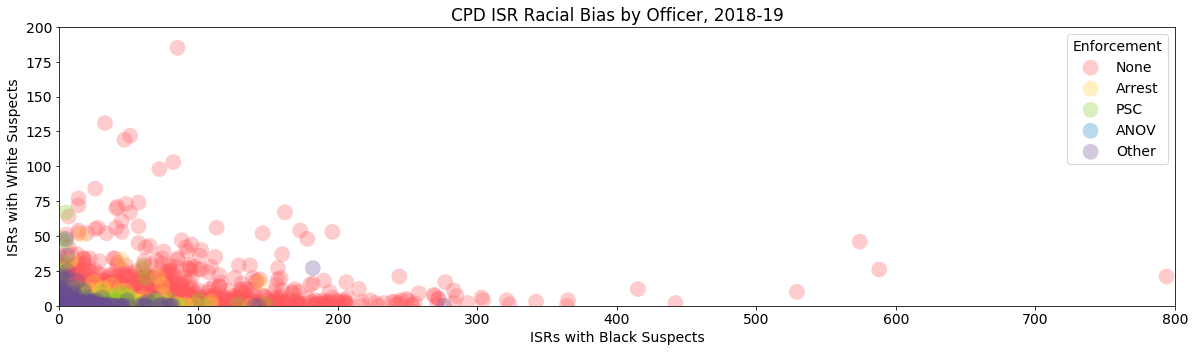

In [123]:
# plotting this racial tendency data on a scatter plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))

colors1 = ['#4fc2cc','#b8d2b5','#e3b49a','#ee806d','#d04b59']
colors2 = ['#e30000','#dd9d9d','#312424','#455845','#f2bd17']
colors3 = ['#ff595e','#ffca3a','#8ac926','#1982c4','#6a4c93']
for i in range(len(cpd_bias_dfs)):
    ax.scatter(cpd_bias_dfs[i]['Black'], cpd_bias_dfs[i]['White'], s=250, label=cpd_bias_labels[i], alpha=0.3, c=colors3[i], linewidths=0, edgecolors='none')

ax.legend(loc='upper right', fancybox=True, title='Enforcement')

# choose the zoom level; it is interesting to see both the close detail near the origin and the whole plot with outliers

#the dense part of the plot
plt.xlim(0, 120)
plt.ylim(0, 30)

#the whole plot
#plt.xlim(0, 800)
#plt.ylim(0, 200)

plt.gca().set_aspect('equal', adjustable='box')

font = {'size':14}
plt.rc('font', **font)


#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)

ax.set_xlabel('ISRs with Black Suspects')
ax.set_ylabel('ISRs with White Suspects')

plt.title(label='CPD ISR Racial Bias by Officer, 2018-19')

plt.show()